In [1]:
using Images, JLD

inspired by http://opensourc.es/blog/tensorflow-mnist

## One by One approach

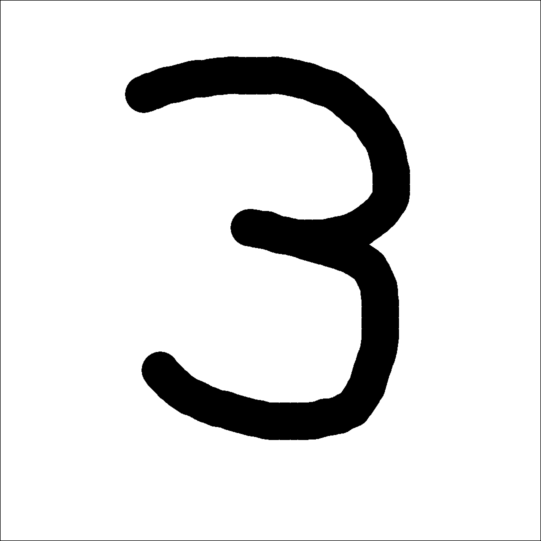

In [2]:
bigger_img = load("bigger_image.png")

Preprocessing according to http://opensourc.es/blog/tensorflow-mnist

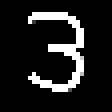

In [3]:
invert_grayed = abs.(Gray.(imresize(bigger_img, (28, 28))) .- 1.0)
colorview(Gray, invert_grayed)

In [4]:
while sum(invert_grayed[1, :]) == 0
    invert_grayed = invert_grayed[2:end, :]
end

In [5]:
while sum(invert_grayed[:, 1]) == 0
    invert_grayed = invert_grayed[:, 2:end]
end

In [6]:
while sum(invert_grayed[end, :]) == 0
    invert_grayed = invert_grayed[1:end-1, :]
end

In [7]:
while sum(invert_grayed[:, end]) == 0
    invert_grayed = invert_grayed[:, 1:end-1]
end

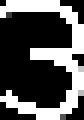

In [8]:
colorview(Gray, invert_grayed)

In [9]:
rows, cols = size(invert_grayed)

(20, 14)

In [10]:
if rows > cols
    factor = 20 / rows
    rows = 20
    cols = Int(round(factor * cols))
    invert_grayed = imresize(invert_grayed, (rows, cols))
else
    factor = 20 / cols
    cols = 20
    rows = Int(round(factor*rows))
    invert_grayed = imresize(invert_grayed, (rows, cols))
end

20×14 Array{Float64,2}:
 0.0  1.0       1.0  1.0  1.0  1.0  1.0  …  1.0  0.0       0.0  0.0  0.0     
 1.0  1.0       1.0  1.0  1.0  1.0  1.0     1.0  1.0       1.0  0.0  0.0     
 1.0  0.231373  0.0  0.0  0.0  0.0  0.0     0.0  1.0       1.0  1.0  0.0     
 0.0  0.0       0.0  0.0  0.0  0.0  0.0     0.0  0.0       1.0  1.0  0.0     
 0.0  0.0       0.0  0.0  0.0  0.0  0.0     0.0  0.0       0.0  1.0  1.0     
 0.0  0.0       0.0  0.0  0.0  0.0  0.0  …  0.0  0.0       0.0  1.0  1.0     
 0.0  0.0       0.0  0.0  0.0  0.0  0.0     0.0  0.0       0.0  1.0  1.0     
 0.0  0.0       0.0  0.0  0.0  0.0  0.0     0.0  0.0       0.0  1.0  1.0     
 0.0  0.0       0.0  0.0  0.0  1.0  1.0     1.0  1.0       1.0  1.0  0.984314
 0.0  0.0       0.0  0.0  0.0  1.0  1.0     1.0  1.0       1.0  0.0  0.0     
 0.0  0.0       0.0  0.0  0.0  0.0  0.0  …  1.0  1.0       1.0  1.0  0.0     
 0.0  0.0       0.0  0.0  0.0  0.0  0.0     0.0  0.0       1.0  1.0  0.784314
 0.0  0.0       0.0  0.0  0.0  0.0  0.0 

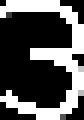

In [11]:
colorview(Gray, invert_grayed)

In [12]:
row_padding = (Int(floor((28 - rows) / 2)), Int(ceil((28 - rows) / 2)))
col_padding  = (Int(floor((28 - cols) / 2)), Int(ceil((28 - cols) / 2)))

(7, 7)

In [13]:
padded_array = parent(padarray(invert_grayed, Fill(0, zip(row_padding, col_padding)...)))

28×28 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

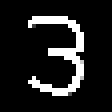

In [14]:
colorview(Gray, padded_array)

In [15]:
NN = jldopen("neural_net.jld", "r") do file
    read(file, "NN")
end

JLD.##Network#671([0.867347 -0.442488 … -0.340619 -0.873264; -0.901744 2.43722 … -0.647797 -0.442795; … ; 1.06249 -0.0549994 … -1.04169 -0.169506; -0.513905 -0.0289992 … -1.67579 -1.29718], [18.075 -9.55064 … -4.98984 -17.3471], [2.94967 3.67872 … -4.22721 1.06799; 2.73597 0.0266899 … -1.41927 -14.9056; … ; -2.78224 -0.683952 … 7.8007 -4.641; -27.0419 1.77507 … -0.0418587 3.36115], [-8.74618 -4.10781 … -5.51078 0.558305], [-6.6625 -4.53696 … -6.10613 5.27975; -4.40443 -1.24794 … -3.24317 -3.93752; … ; -3.10097 3.61379 … -1.70854 -0.260706; -2.64243 -5.45298 … -4.2565 0.627218], [-4.24536 -3.4018 … -0.557889 -2.804])

In [16]:
σ(x) = 1 ./ (1 .+ e.^-x)
predict(x) = σ(σ(σ(x * NN.w1 + NN.b1) * NN.w2 + NN.b2) * NN.w3 + NN.b3)

predict (generic function with 1 method)

In [17]:
test_array = reshape(padded_array, 1, 784)

1×784 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [18]:
findmax(predict(test_array))

(0.9990785016763981, 4)

## WRAP-UP

In [19]:
function get_preprocessed_img(path)
    img = load(path)
    invert_grayed = abs.(Gray.(imresize(img, (28, 28))) .- 1.0)
    while sum(invert_grayed[1, :]) == 0
        invert_grayed = invert_grayed[2:end, :]
    end
    while sum(invert_grayed[:, 1]) == 0
        invert_grayed = invert_grayed[:, 2:end]
    end
    while sum(invert_grayed[end, :]) == 0
        invert_grayed = invert_grayed[1:end-1, :]
    end
    while sum(invert_grayed[:, end]) == 0
        invert_grayed = invert_grayed[:, 1:end-1]
    end
    rows, cols = size(invert_grayed)
    if rows > cols
        factor = 20 / rows
        rows = 20
        cols = Int(round(factor * cols))
        invert_grayed = imresize(invert_grayed, (rows, cols))
    else
        factor = 20 / cols
        cols = 20
        rows = Int(round(factor*rows))
        invert_grayed = imresize(invert_grayed, (rows, cols))
    end
    row_padding = (Int(floor((28 - rows) / 2)), Int(ceil((28 - rows) / 2)))
    col_padding  = (Int(floor((28 - cols) / 2)), Int(ceil((28 - cols) / 2)))
    parent(padarray(invert_grayed, Fill(0, zip(row_padding, col_padding)...)))
end

get_preprocessed_img (generic function with 1 method)

In [20]:
NN = jldopen("neural_net.jld", "r") do file
    read(file, "NN")
end
σ(x) = 1 ./ (1 .+ e.^-x)
predict(x) = σ(σ(σ(x * NN.w1 + NN.b1) * NN.w2 + NN.b2) * NN.w3 + NN.b3)

predict (generic function with 1 method)

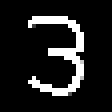

In [21]:
pre_image = get_preprocessed_img("bigger_image.png")
colorview(Gray, pre_image)

In [22]:
prediction_data = reshape(pre_image, 1, 784)
findmax(predict(prediction_data))[2] - 1

3